# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat

--2023-02-18 04:13:47--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-18 04:13:48 (241 MB/s) - ‘train.dat’ saved [11244/11244]

--2023-02-18 04:13:48--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-18 04:13:48 (101 MB/s) - ‘test.dat’ saved [2844/2844]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re
import numpy as np


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return np.dot(array1, array2) 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1 + np.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight,instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if (output(weights, instance)) >= 0.5:
      return 1
    else:
      return 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Assigning weights with zeros in the length of no.of parameters
    weights = [0] * (len(instances[0]))

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Calculating output with activation function
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Learning the error and adjusting weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Because in predict function we are smoothing the output to either 0 or 1. So, when we calculate the error it is either 0 0r 1 or -1. But to train the weights correctly we need the accurate output to calculate the exact error and propagate it back.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



When we observe the reults with all the combinations of hyperparameters, we can observe that the accuracy is more than 80% when we we atleast use 50% of training data and more than 20 epochs irrespective of learning rate.

When we plot the graphs between lr, epochs, tr percent vs accuracy, we got the following results.

In the graph lr vs accuracy, we can observe that there is tremendous increase in accuracy when lr>0.01.

In graph tr percent vs accuracy, we can observe that model is doing better when we atleast use 50% of data.

In graph epochs vs accuracy, we can observe that there is 100% accuracy after 50 epochs.

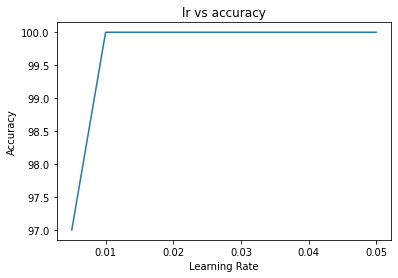

In [6]:
import matplotlib.pyplot as plt

acc=[]
for lr in lr_array:
  size =  round(len(instances_tr)*50/100)
  pre_instances = instances_tr[0:size]
  weights = train_perceptron(pre_instances, lr, 50)
  accuracy = get_accuracy(weights, instances_te)
  acc.append(accuracy)
plt.plot(lr_array, acc)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('lr vs accuracy')
plt.show();

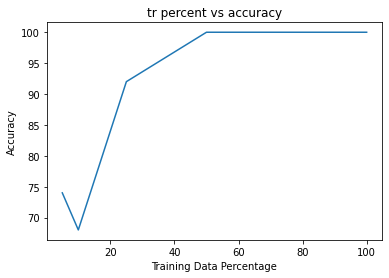

In [7]:
acc=[]
for tr_size in tr_percent:
  size =  round(len(instances_tr)* tr_size/100)
  pre_instances = instances_tr[0:size]
  weights = train_perceptron(pre_instances, 0.01, 50)
  accuracy = get_accuracy(weights, instances_te)
  acc.append(accuracy)
plt.plot(tr_percent, acc)
plt.xlabel('Training Data Percentage')
plt.ylabel('Accuracy')
plt.title('tr percent vs accuracy')
plt.show();

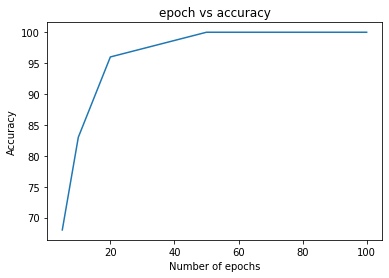

In [8]:
acc=[]
for epoch in num_epochs:
  size =  round(len(instances_tr)* 50/100)
  pre_instances = instances_tr[0:size]
  weights = train_perceptron(pre_instances, 0.01, epoch)
  accuracy = get_accuracy(weights, instances_te)
  acc.append(accuracy)
plt.plot(num_epochs, acc)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('epoch vs accuracy')
plt.show();

**A.** Yes. If we train the model with all the training data, we will get high accuracy because there will be almost all testcases that a model might need to predict. But, we need to make sure to split train data, validation data and test data to check the accuracy in a right way.


**B.** Though the second one uses more training data, we can see the learning rate of first model is 0.050 and the learning rate of second model is 0.005. This case tells us how learning rate plays a key role in training a model. In the second case, the lr is slightly smaller. So, we can understand that the model did not reach the minima of gradient decent after 20 epochs.

**C.** Fine tuning of hyperparametes also plays a key role in better accuracy of the model. Hyperparameters like learning rate, no.of epochs, batch size, activation function, etc has to be choosen for a model based on the algorithm we are choosing and the data we have. In order to optimise the accuracy of a model, it is better to add additional hyperparameters after checking which parameters works best for our data.

**D.** Yes. It is mostly worth to increase the number of epochs for better accuracy. But the no.of epochs should not be too much because it may lead to overfitting. It is better to terminate the loop when there is no significant change in the accuracy after a set of epochs in case we are not sure about the right value for no.of epochs. While selecting the number of epochs we should keep the value of lr in mind. If lr is too large and number of epochs is also more, then we will end up in a loop in the gradient decent. If lr is too small and the no.of epochs is also small, we will not reach the minima in gradient decent.